# 0.1 Imports

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import os

from typing import Dict, List, Tuple, Sequence

2024-12-13 10:16:32.862572: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 10:16:32.869068: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 10:16:32.894908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734084992.935158   10116 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734084992.947005   10116 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 10:16:32.986541: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# 1. Data Import & Cleaning

In [2]:
current_dir = os.getcwd()
current_dir

'/home/jupyter/powder_alert2.0'

In [3]:
relative_path = os.path.dirname(current_dir)
relative_path

'/home/jupyter'

In [4]:
file_name = "powder_alert2.0/historical_weather_openmeteo_01011979-08122024.csv"

file_path = os.path.join(relative_path, file_name)

df = pd.read_csv(file_path, parse_dates=['date'])

In [5]:
df['datetime'] = pd.to_datetime(df['date'])  # Convert 'datetime' column to datetime format
df.set_index('datetime', inplace=True)

df['hour_sin'] = np.sin(2 * np.pi * df.index.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df.index.hour / 24)

df['day_of_week_sin'] = np.sin(2 * np.pi * df.index.dayofweek / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df.index.dayofweek / 7)

df['month_sin'] = np.sin(2 * np.pi * (df.index.month - 1) / 12)
df['month_cos'] = np.cos(2 * np.pi * (df.index.month - 1) / 12)

In [6]:
df['date'] = df['date'].dt.tz_localize(None) # remove the UTC

In [7]:
df.dtypes

date                             datetime64[ns]
temperature_2m                          float64
relative_humidity_2m                    float64
dew_point_2m                            float64
apparent_temperature                    float64
precipitation                           float64
rain                                    float64
snowfall                                float64
snow_depth                              float64
weather_code                            float64
pressure_msl                            float64
surface_pressure                        float64
cloud_cover                             float64
cloud_cover_low                         float64
cloud_cover_mid                         float64
cloud_cover_high                        float64
et0_fao_evapotranspiration              float64
vapour_pressure_deficit                 float64
wind_speed_10m                          float64
wind_speed_100m                         float64
wind_direction_10m                      

In [8]:
df.shape

(402696, 38)

In [9]:
df.tail(2)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-12-08 22:00:00+00:00,2024-12-08 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000,0.866025,-0.781831,0.62349,-0.5,0.866025
2024-12-08 23:00:00+00:00,2024-12-08 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.258819,0.965926,-0.781831,0.62349,-0.5,0.866025


In [10]:
df = df.drop(columns="date")

In [11]:
df.columns

Index(['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'sunshine_duration', 'hour_sin',
       'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin',
       'month_cos'],
      dtype='object')

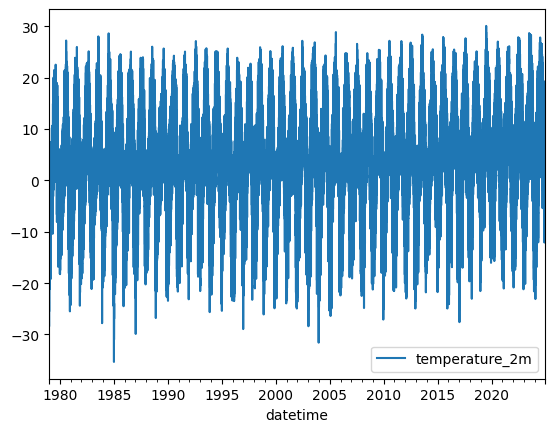

In [12]:
df.plot(y='temperature_2m');

In [13]:
df = df.drop_duplicates()
df = df.dropna()

# 2. Dataset

In [14]:
correlation_matrix = df.corr()
temperature_corr = correlation_matrix['temperature_2m']
high_corr_features = temperature_corr[abs(temperature_corr) > 0.55]
high_corr_features

temperature_2m                  1.000000
dew_point_2m                    0.916477
apparent_temperature            0.997744
snow_depth                     -0.583992
et0_fao_evapotranspiration      0.595305
vapour_pressure_deficit         0.640137
soil_temperature_0_to_7cm       0.828880
soil_temperature_7_to_28cm      0.762774
soil_temperature_28_to_100cm    0.661029
month_cos                      -0.782985
Name: temperature_2m, dtype: float64

In [15]:
features = [
    "temperature_2m",
    "dew_point_2m",
    "apparent_temperature",
    "snow_depth",
    "et0_fao_evapotranspiration",
    "vapour_pressure_deficit",
    "soil_temperature_0_to_7cm",
    "soil_temperature_7_to_28cm",
    "soil_temperature_28_to_100cm",
    "month_cos"]

In [16]:
features = [col for col in features if col in df.columns]
df = df[features]
df.tail(1)

,temperature_2m,dew_point_2m,apparent_temperature,snow_depth,et0_fao_evapotranspiration,vapour_pressure_deficit,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,month_cos
datetime,,,,,,,,,,
2024-12-03 23:00:00+00:00,-2.951,-4.851,-5.981707,0.17,0.0,0.065454,-0.951,-0.701,1.449,0.866025


# 3. Folds

In [17]:
rows = df.shape[0]
days = rows/24
weeks = days/7
months = weeks/4
years = months/ 12
print(f'DS includes {rows} rows --> hours')
print(f'DS includes {days} --> days')
print(f'DS includes {weeks} --> weeks')
print(f'DS includes {months} --> months')
print(f'DS includes {years} --> years')

DS includes 402072 rows --> hours
DS includes 16753.0 --> days
DS includes 2393.285714285714 --> weeks
DS includes 598.3214285714286 --> months
DS includes 49.860119047619044 --> years


In [18]:
# Folds
FOLD_LENGTH = rows      # each fold will have the whole data
FOLD_STRIDE = 1 # sliding one hour

# Temporal Train-Test split
TRAIN_TEST_RATIO = 0.66
N_TRAIN = 6666 # number_of_sequences_train for each fold_train
N_TEST =  3333 # number_of_sequences_test for each fold_test

# Inputs
N_FEATURES = 37
INPUT_LENGTH = 24 # - Records every hour = 48 hours
                    # - During two weeks, which is quite common for weather forecasts

# Outputs
TARGET = ['temperature_2m']
TARGET_COLUMN_IDX = 0 # 'temperature_2m' corresponds to the second column of the df
N_TARGETS = 1
OUTPUT_LENGTH = N_TARGETS*24 # - Predicting one target, the temperature
                              # - for two days with predictions every hour

# Additional parameters
HORIZON = 1 # - We are predicting next two days

In [19]:
def get_folds(
    df: pd.DataFrame,
    fold_length: int,
    fold_stride: int) -> List[pd.DataFrame]:
    '''
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold

    Returns a list of folds, each as a DataFrame
    '''

    folds = []
    for idx in range(0, len(df), fold_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (idx + fold_length) > len(df):
            break
        fold = df.iloc[idx:idx + fold_length, :]
        folds.append(fold)
    return folds

In [20]:
folds = get_folds(df, FOLD_LENGTH, FOLD_STRIDE)

print(f'The function generated {len(folds)} folds.')
print(f'Each fold has a shape equal to {folds[0].shape}.')

The function generated 1 folds.
Each fold has a shape equal to (402072, 10).


In [21]:
fold = folds[0]

In [22]:
fold.shape

(402072, 10)

# 4. Creating Sequences

In [23]:
def train_test_split(fold: pd.DataFrame,
                     train_test_ratio: float,
                     input_length: int,
                     horizon: int) -> Tuple[pd.DataFrame]:
    '''
    Returns a train dataframe and a test dataframe (fold_train, fold_test)
    from which one can sample (X,y) sequences.
    df_train should contain all the timesteps until round(train_test_ratio * len(fold))
    '''

    # TRAIN SET
    # ======================
    last_train_idx = round(train_test_ratio * len(fold))
    fold_train = fold.iloc[0:last_train_idx, :]

    # TEST SET
    # ======================
    first_test_idx = last_train_idx - input_length
    fold_test = fold.iloc[first_test_idx:, :]

    return (fold_train, fold_test)

In [24]:
(fold_train, fold_test) = train_test_split(fold,
                                           TRAIN_TEST_RATIO,
                                           INPUT_LENGTH,
                                           HORIZON)

In [25]:
fold_train.shape, fold_test.shape

((265368, 10), (136728, 10))

In [26]:
fold_train.index[0]

Timestamp('1979-01-01 00:00:00+0000', tz='UTC')

In [27]:
# Inputs
print("##### INPUTS #####")
print(f'- INPUT_LENGTH = {INPUT_LENGTH} timesteps = {int(INPUT_LENGTH/24)} days = {int(INPUT_LENGTH/24/7)} weeks')
print(f'- N_FEATURES = {N_FEATURES}')
# Outputs
print("##### OUTPUTS #####")
print(f'- OUTPUT_LENGTH = {OUTPUT_LENGTH} timesteps = {int(OUTPUT_LENGTH/24)} day(s)')
print(f'- N_TARGETS = {N_TARGETS}')
# Parameters
print("##### PARAMETERS #####")
print(f'- HORIZON = {HORIZON} timesteps = {int(HORIZON/24)} day(s)')
# Train
print("##### TRAIN SET #####")
print(f"- The training fold starts at index {fold_train.index[0]} and stops at index {fold_train.index[-1]}.")
# Test
print("##### TEST SET #####")
print(f"- The test fold starts at index {fold_test.index[0]} and stops at index {fold_test.index[-1]}.")

##### INPUTS #####
- INPUT_LENGTH = 24 timesteps = 1 days = 0 weeks
- N_FEATURES = 37
##### OUTPUTS #####
- OUTPUT_LENGTH = 24 timesteps = 1 day(s)
- N_TARGETS = 1
##### PARAMETERS #####
- HORIZON = 1 timesteps = 0 day(s)
##### TRAIN SET #####
- The training fold starts at index 1979-01-01 00:00:00+00:00 and stops at index 2009-04-09 23:00:00+00:00.
##### TEST SET #####
- The test fold starts at index 2009-04-09 00:00:00+00:00 and stops at index 2024-12-03 23:00:00+00:00.


In [28]:
# New: Scanning  through a fold
STRIDE = 1 # sliding every day, for instance
print(f'STRIDE = {STRIDE} timesteps = {int(STRIDE/24)} day(s)')

STRIDE = 1 timesteps = 0 day(s)


In [29]:
def get_Xi_yi(first_index: int,
              fold: pd.DataFrame,
              horizon: int,
              input_length: int,
              output_length: int) -> Tuple[np.ndarray, np.ndarray]:
    '''
    - extracts one sequence from a fold
    - returns a pair (Xi, yi) with:
        * len(Xi) = `input_length` and Xi starting at first_index
        * len(yi) = `output_length`
        * last_Xi and first_yi separated by the gap = horizon -1
    '''

    Xi_start = first_index
    Xi_last = Xi_start + input_length
    yi_start = Xi_last + horizon - 1
    yi_last = yi_start + output_length

    Xi = fold[Xi_start:Xi_last]
    yi = fold[yi_start:yi_last][TARGET]

    return (Xi, yi)

In [30]:
def get_X_y(fold: pd.DataFrame,
            horizon: int,
            input_length: int,
            output_length: int,
            stride: int,
            shuffle=False) -> Tuple[np.ndarray, np.ndarray]:
    """
    - Uses `data`, a 2D-array with axis=0 for timesteps, and axis=1 for (targets+covariates columns)
    - Returns a Tuple (X,y) of two ndarrays :
        * X.shape = (n_samples, input_length, n_covariates)
        * y.shape =
            (n_samples, output_length, n_targets) if all 3-dimensions are of size > 1
            (n_samples, output_length) if n_targets == 1
            (n_samples, n_targets) if output_length == 1
            (n_samples, ) if both n_targets and lenghts == 1
    - You can shuffle the pairs (Xi,yi) of your fold
    """

    X = []
    y = []

    for i in range(0, len(fold), stride):
        ## Extracting a sequence starting at index_i
        Xi, yi = get_Xi_yi(first_index=i,
                           fold=fold,
                           horizon=horizon,
                           input_length=input_length,
                           output_length=output_length)
        ## Exits loop as soon as we reach the end of the dataset
        if len(yi) < output_length:
            break
        X.append(Xi)
        y.append(yi)

    X = np.array(X)
    y = np.array(y)
    y = np.squeeze(y)

    if shuffle:
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

    return X, y

In [31]:
X_train, y_train = get_X_y(fold=fold_train,
                           horizon=HORIZON,
                           input_length=INPUT_LENGTH,
                           output_length=OUTPUT_LENGTH,
                           stride=STRIDE)
X_test, y_test = get_X_y(fold=fold_test,
                         horizon=HORIZON,
                         input_length=INPUT_LENGTH,
                         output_length=OUTPUT_LENGTH,
                         stride=STRIDE)

print("Shapes for the training set:")
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")

print("Shapes for the test set:")
print(f"X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

Shapes for the training set:
X_train.shape = (265321, 24, 10), y_train.shape = (265321, 24)
Shapes for the test set:
X_test.shape = (136681, 24, 10), y_test.shape = (136681, 24)


# 5. Modelling

## 5.1 Main Model

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Normalization, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

def init_model(X_train):
    reg_l2 = regularizers.L2(0.1)

    #========================================================================================

    # 1 - RNN architecture
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1], X_train.shape[2])))

    # Recurrent Layer
    model.add(layers.LSTM(units=32, activation='tanh',return_sequences=True,
                        #   recurrent_dropout=0.3,dropout=0.3
                        )
                          )

    # Hidden Dense Layer that we are regularizing
    model.add(layers.Dense(16, activation="relu",
                        #    kernel_regularizer = reg_l2
                        )
                           )
    # model.add(layers.Dropout(rate=0.3))

    # Predictive Dense Layer
    model.add(layers.Dense(1, activation='linear'))

    #========================================================================================

    # 2 - Compiler
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='mse', optimizer=optimizer, metrics=["mae"])

    return model


In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

def fit_model(model: tf.keras.Model, verbose=1) -> Tuple[tf.keras.Model, dict]:

    es = EarlyStopping(
        monitor="val_mae",
        patience=10,
        mode="min",
        restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(
        monitor='val_mae',
        factor=0.1,
        patience=5,
        min_lr=1e-6)

    history = model.fit(
        X_train,
        y_train,
        validation_split=0.3,
        shuffle=False,
        batch_size=64,
        epochs=100,
        callbacks=[es, reduce_lr],
        verbose=verbose)

    return model, history

In [34]:
def plot_history(history):

    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE ---
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRICS:MAE ---

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    return ax

In [35]:
model = init_model(X_train)
model.summary()

2024-12-13 10:22:22.982611: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 32)         │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24, 16)         │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24, 1)          │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,049 (23.63 KB)

 Trainable params: 6,049 (23.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 60s 20ms/step - loss: 48.3060 - mae: 5.2858 - val_loss: 13.9570 - val_mae: 2.8595 - learning_rate: 1.0000e-04
Epoch 2/100
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 56s 19ms/step - loss: 12.2727 - mae: 2.6280 - val_loss: 10.7090 - val_mae: 2.5233 - learning_rate: 1.0000e-04
Epoch 3/100
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 54s 19ms/step - loss: 10.2675 - mae: 2.4239 - val_loss: 10.1424 - val_mae: 2.4532 - learning_rate: 1.0000e-04
Epoch 4/100
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 57s 20ms/step - loss: 9.8054 - mae: 2.3788 - val_loss: 9.9399 - val_mae: 2.4273 - learning_rate: 1.0000e-04
Epoch 5/100
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 57s 20ms/step - loss: 9.5879 - mae: 2.3566 - val_loss: 9.8263 - val_mae: 2.4126 - learning_rate: 1.0000e-04
Epoch 6/100
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 56s 19ms/step - loss: 9.4482 - mae: 2.3415 - val_loss: 9.7473 - val_mae: 2.4023 - learning_rate: 1.0000e-04
Epoch 7/100
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 83s 19ms/step - loss: 9.3485 - mae: 2.3301 - 

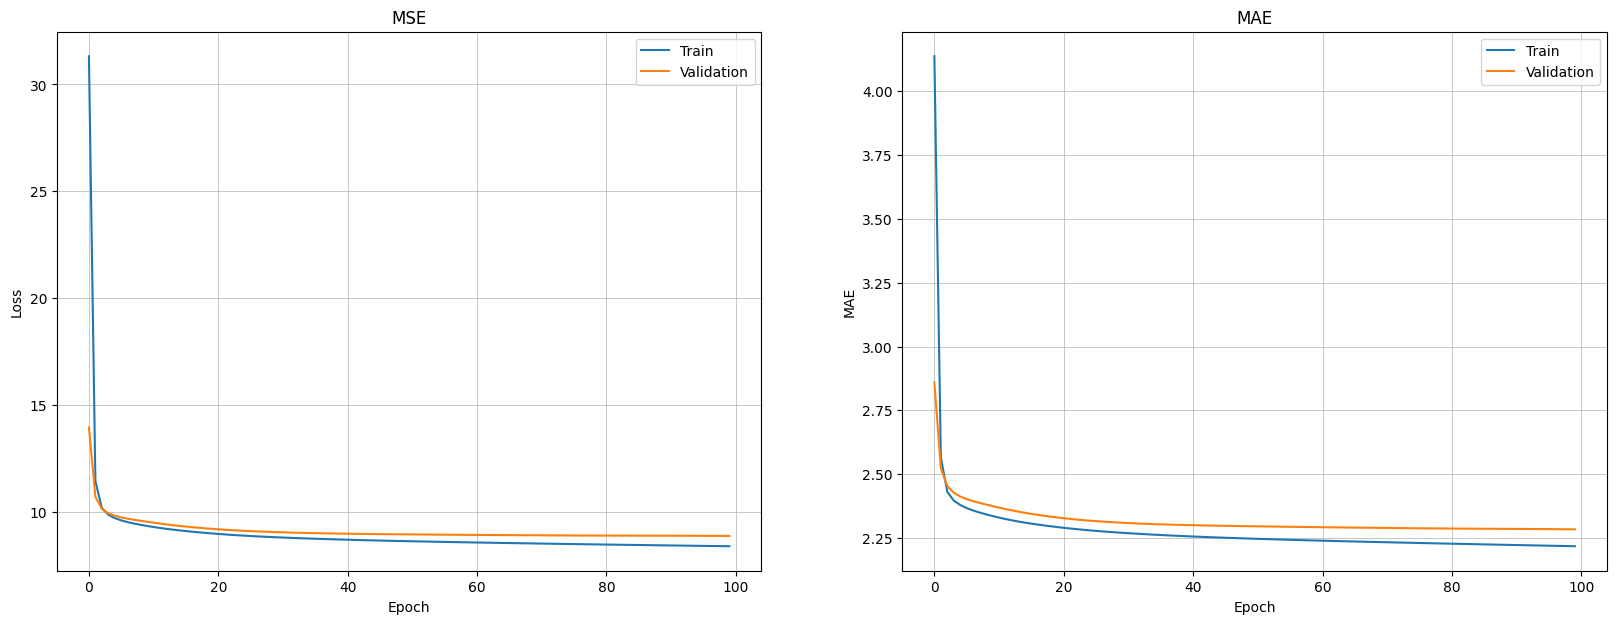

In [36]:
# 2 - Training
# ====================================
model, history = fit_model(model, verbose=1)

plot_history(history);

# 3 - Evaluation
# ====================================
res = model.evaluate(X_test, y_test)
print("-"*50)
print(f"The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")

## 5.2 Baseline

In [37]:
def last_seen_value_baseline(X_test, y_test, target_column_idx=0):
    """
    Baseline model that predicts the last observed value of the target variable (temperature).

    Parameters:
    X: Input features (shape: [num_samples, time_steps, num_features])
    y: Ground truth values (shape: [num_samples, time_steps, num_targets])
    target_column_idx: Index of the target variable in the input features

    Returns:
    baseline_mae: Mean Absolute Error (MAE) of the baseline model
    """
    # Get the last observed value of the target (temperature) for each sample
    last_seen_values = X_test[:, -1, target_column_idx].reshape(-1, 1)

    # Repeat this value for all the output steps
    output_length = y_test.shape[1]  # Number of time steps in the target sequence
    repeated = np.repeat(last_seen_values, axis=1, repeats=output_length)

    # Calculate the MAE: Mean of absolute errors
    mae = np.mean(np.abs(y_test - repeated))

    return mae

In [38]:
# 1 - Evaluation of the Baseline Model
# ====================================
mae_baseline = last_seen_value_baseline(X_test, y_test, target_column_idx=0)
print(f"- The Baseline MAE on the test set is equal to {round(mae_baseline,2)} Celsius degrees")

# 4 - Comparison with the LSTM model
# ====================================
print(f"- The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")
print(f"👉 Improvement/decrease of the LSTM model over the baseline (on this fold for the test set): {round((1 - (res[1]/mae_baseline))*100,2)} % 👈")

- The Baseline MAE on the test set is equal to 4.11 Celsius degrees
- The LSTM MAE on the test set is equal to 2.41 Celsius degrees
👉 Improvement/decrease of the LSTM model over the baseline (on this fold for the test set): 41.5 % 👈


## 5.3 Optimizing on Hyperparameters

In [39]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel
from keras_tuner import RandomSearch

class LSTMModel(HyperModel):
    def build(self, hp):
        reg_l2 = regularizers.L2(hp.Float('l2_reg', min_value=0.001, max_value=0.1, step=0.001))

        #========================================================================================

        model = models.Sequential()

        # Input Layer
        model.add(layers.Input(shape=(X_train.shape[1], X_train.shape[2])))

        # Recurrent Layer with tunable units and dropout
        model.add(layers.LSTM(
            units=hp.Int('units', min_value=16, max_value=128, step=16),
            activation='tanh',
            return_sequences=True,
            recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.05),
            dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.05)
        ))
        model.add(layers.LSTM(
            units=hp.Int('units', min_value=16, max_value=128, step=16),
            activation='tanh',
            return_sequences=True,
            recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.05),
            dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.05)
        ))

        # Hidden Dense Layer with tunable regularization
        model.add(layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation="relu",
            kernel_regularizer=reg_l2
        ))
        model.add(layers.Dropout(rate=hp.Float('dense_dropout', min_value=0.2, max_value=0.5, step=0.05)))

        # Output Layer
        model.add(layers.Dense(1, activation='linear'))

        #========================================================================================

        # Compile the model
        model.compile(
            loss='mse',
            optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
            metrics=["mae"]
        )

        return model

In [40]:
tuner = RandomSearch(
    LSTMModel(),  # The HyperModel class
    objective='val_mae',  # We want to minimize validation MAE
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='models',  # Directory to store logs and models
    project_name='temperature_hyperparameters')

tuner.search(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.3,  # Use a validation split
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=2)])

Reloading Tuner from models/temperature_hyperparameters/tuner0.json


In [41]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build the best model with those hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=15)]
)

# Evaluate the best model on the test set
test_results = best_model.evaluate(X_test, y_test)
print(f"Test MAE: {test_results[1]} Celsius degrees")

Best Hyperparameters: {'l2_reg': 0.07200000000000001, 'units': 48, 'recurrent_dropout': 0.2, 'dropout': 0.25, 'dense_units': 96, 'dense_dropout': 0.4, 'learning_rate': 0.004817189232254613}
Epoch 1/100
3317/3317 ━━━━━━━━━━━━━━━━━━━━ 127s 37ms/step - loss: 15.5838 - mae: 2.9207 - val_loss: 12.3556 - val_mae: 2.7844
Epoch 2/100
3317/3317 ━━━━━━━━━━━━━━━━━━━━ 121s 36ms/step - loss: 11.9834 - mae: 2.6245 - val_loss: 12.1603 - val_mae: 2.7136
Epoch 3/100
3317/3317 ━━━━━━━━━━━━━━━━━━━━ 122s 37ms/step - loss: 11.7232 - mae: 2.5947 - val_loss: 10.7978 - val_mae: 2.5699
Epoch 4/100
3317/3317 ━━━━━━━━━━━━━━━━━━━━ 143s 37ms/step - loss: 11.5156 - mae: 2.5703 - val_loss: 12.2892 - val_mae: 2.7794
Epoch 5/100
3317/3317 ━━━━━━━━━━━━━━━━━━━━ 142s 37ms/step - loss: 11.4547 - mae: 2.5636 - val_loss: 11.8510 - val_mae: 2.6958
Epoch 6/100
3317/3317 ━━━━━━━━━━━━━━━━━━━━ 123s 37ms/step - loss: 11.3419 - mae: 2.5522 - val_loss: 11.5262 - val_mae: 2.6824
Epoch 7/100
3317/3317 ━━━━━━━━━━━━━━━━━━━━ 123s 37ms/s

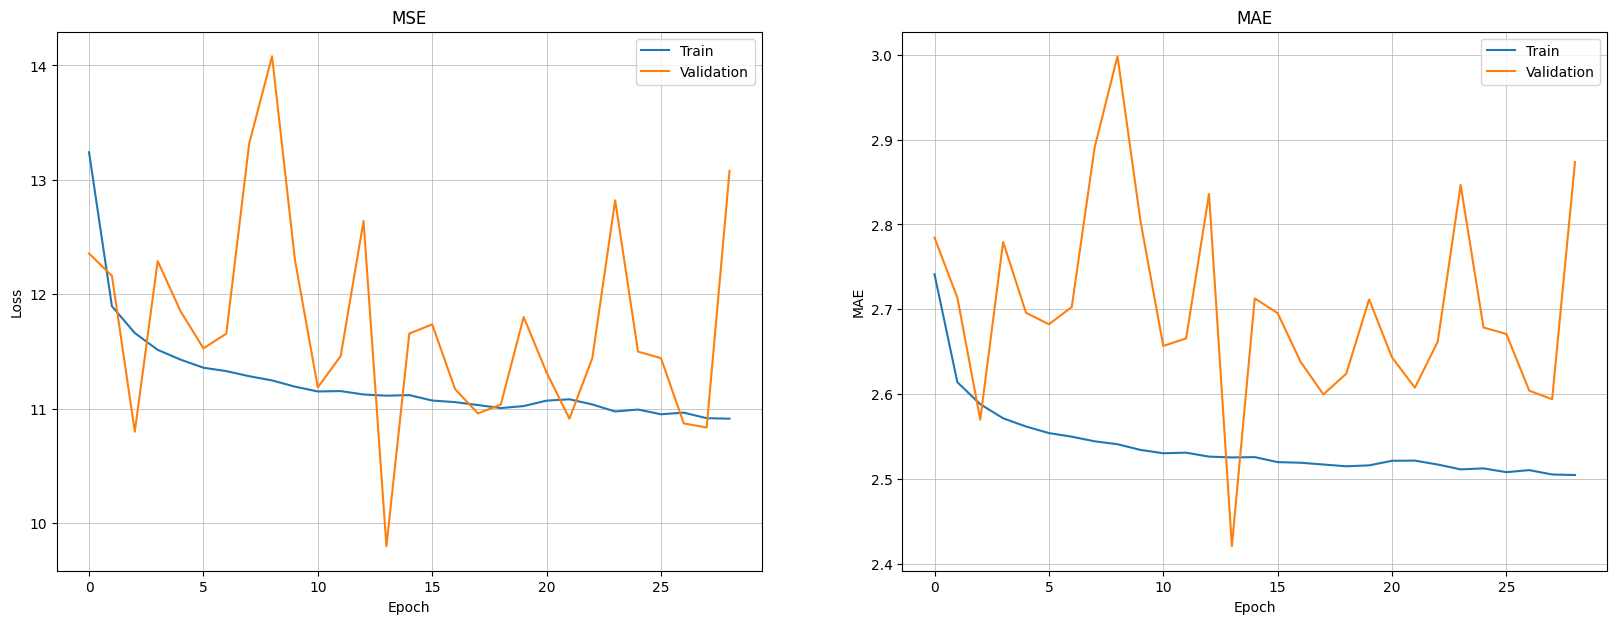

In [42]:
plot_history(history);

# 5.3. Safe/ Load model

In [43]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras import models

In [53]:
relative_path = os.path.dirname(current_dir)
models_folder = os.path.join(relative_path, "powder_alert2.0/models")

save_as_keras = os.path.join(models_folder, 'fullDS_features.keras')

In [54]:
model.save(save_as_keras)

In [46]:
loaded_model_keras = tf.keras.models.load_model(save_as_keras)

# 6. Prediction

In [47]:
last_input = X_test[-1:]
last_input.shape

(1, 24, 10)

In [48]:
best_model = loaded_model_keras # needs to be changed to load the best/ current model --> best_model

In [49]:
predictions = best_model.predict(last_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


In [50]:
predicted_temperatures = predictions[0]
print(f'The temperature for the upcoming 24 h range from {predicted_temperatures.min()} to {predicted_temperatures.max()} Celsius degrees.')

The temperature for the upcoming 24 h range from -4.029145240783691 to 5.471347332000732 Celsius degrees.


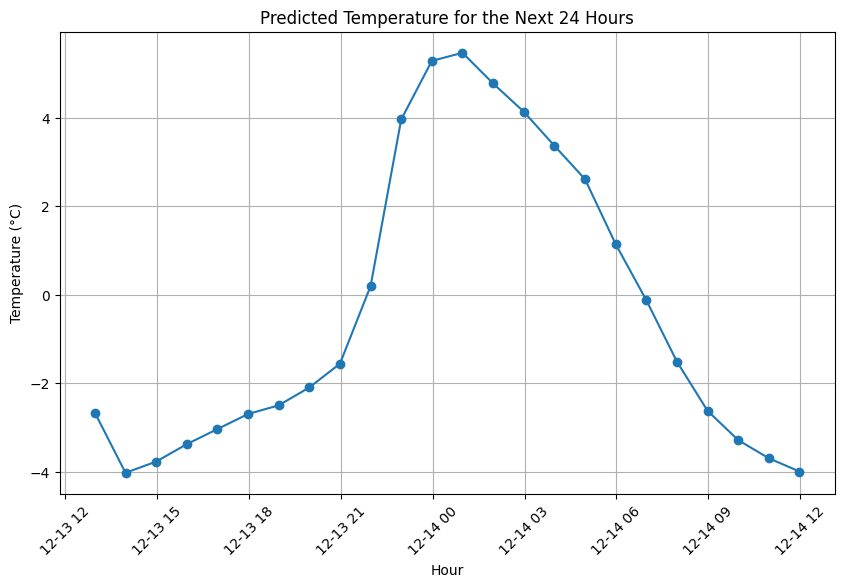

In [51]:
predicted_df = pd.DataFrame(predicted_temperatures, columns=["Predicted Temperature"])
predicted_df["Hour"] = pd.date_range(start=pd.to_datetime('now'), periods=24, freq='h')

# Plot the predicted temperatures
plt.figure(figsize=(10,6))
plt.plot(predicted_df["Hour"], predicted_df["Predicted Temperature"], marker='o')
plt.title("Predicted Temperature for the Next 24 Hours")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show();